# Defintions
- Stands for *Bidirectional Encoder Representations from Transformer*
- Two Steps: pre-training & fine-tuning
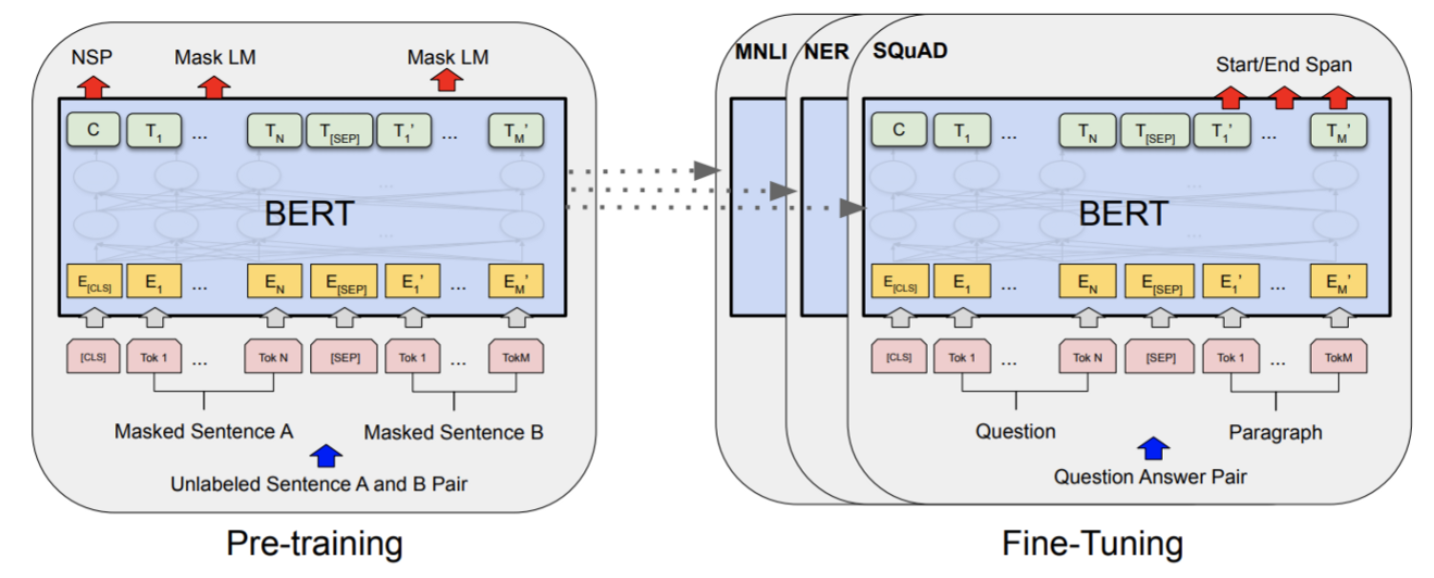


- The creative point concentrate on ***Pre-training*** part: Use **Masked LM(MLM)** or **Next Sentence Prediction(NSP)** to represent and capture words and sentence, 🌟without needs of providing specific task structure modifications.Large suitable for sentence-level and token-level tasks.
- Application:
   - BERT performs well in Sentence/Document Similarity, Question Answering, Sentiment Analysis,Language Inference by analyzing them historically,Named Entity Recongnition,Text Summarization...tasks in NLP
     - Sentiment Analysis: Negative/Positive
     - Fact checking: Spam Email Classification...
   - The `Google Search` Engine uses BERT(NLU,language understanding), not just word matching.
- The BERT Family:
   - `ALBERT`: parameter reduction to speed up the training of BERT
   - `RoBERTa`:Show more training/tuning results, because of the under-trained original BERT model
   - `ERNIE`:entry-level and phrase-level masking
   - `DistilBERT`: Smaller bert use distillation from HuggingFace.
   - For more can reference to https://gluebenchmark.com/leaderboard


- 3D structure of BERT
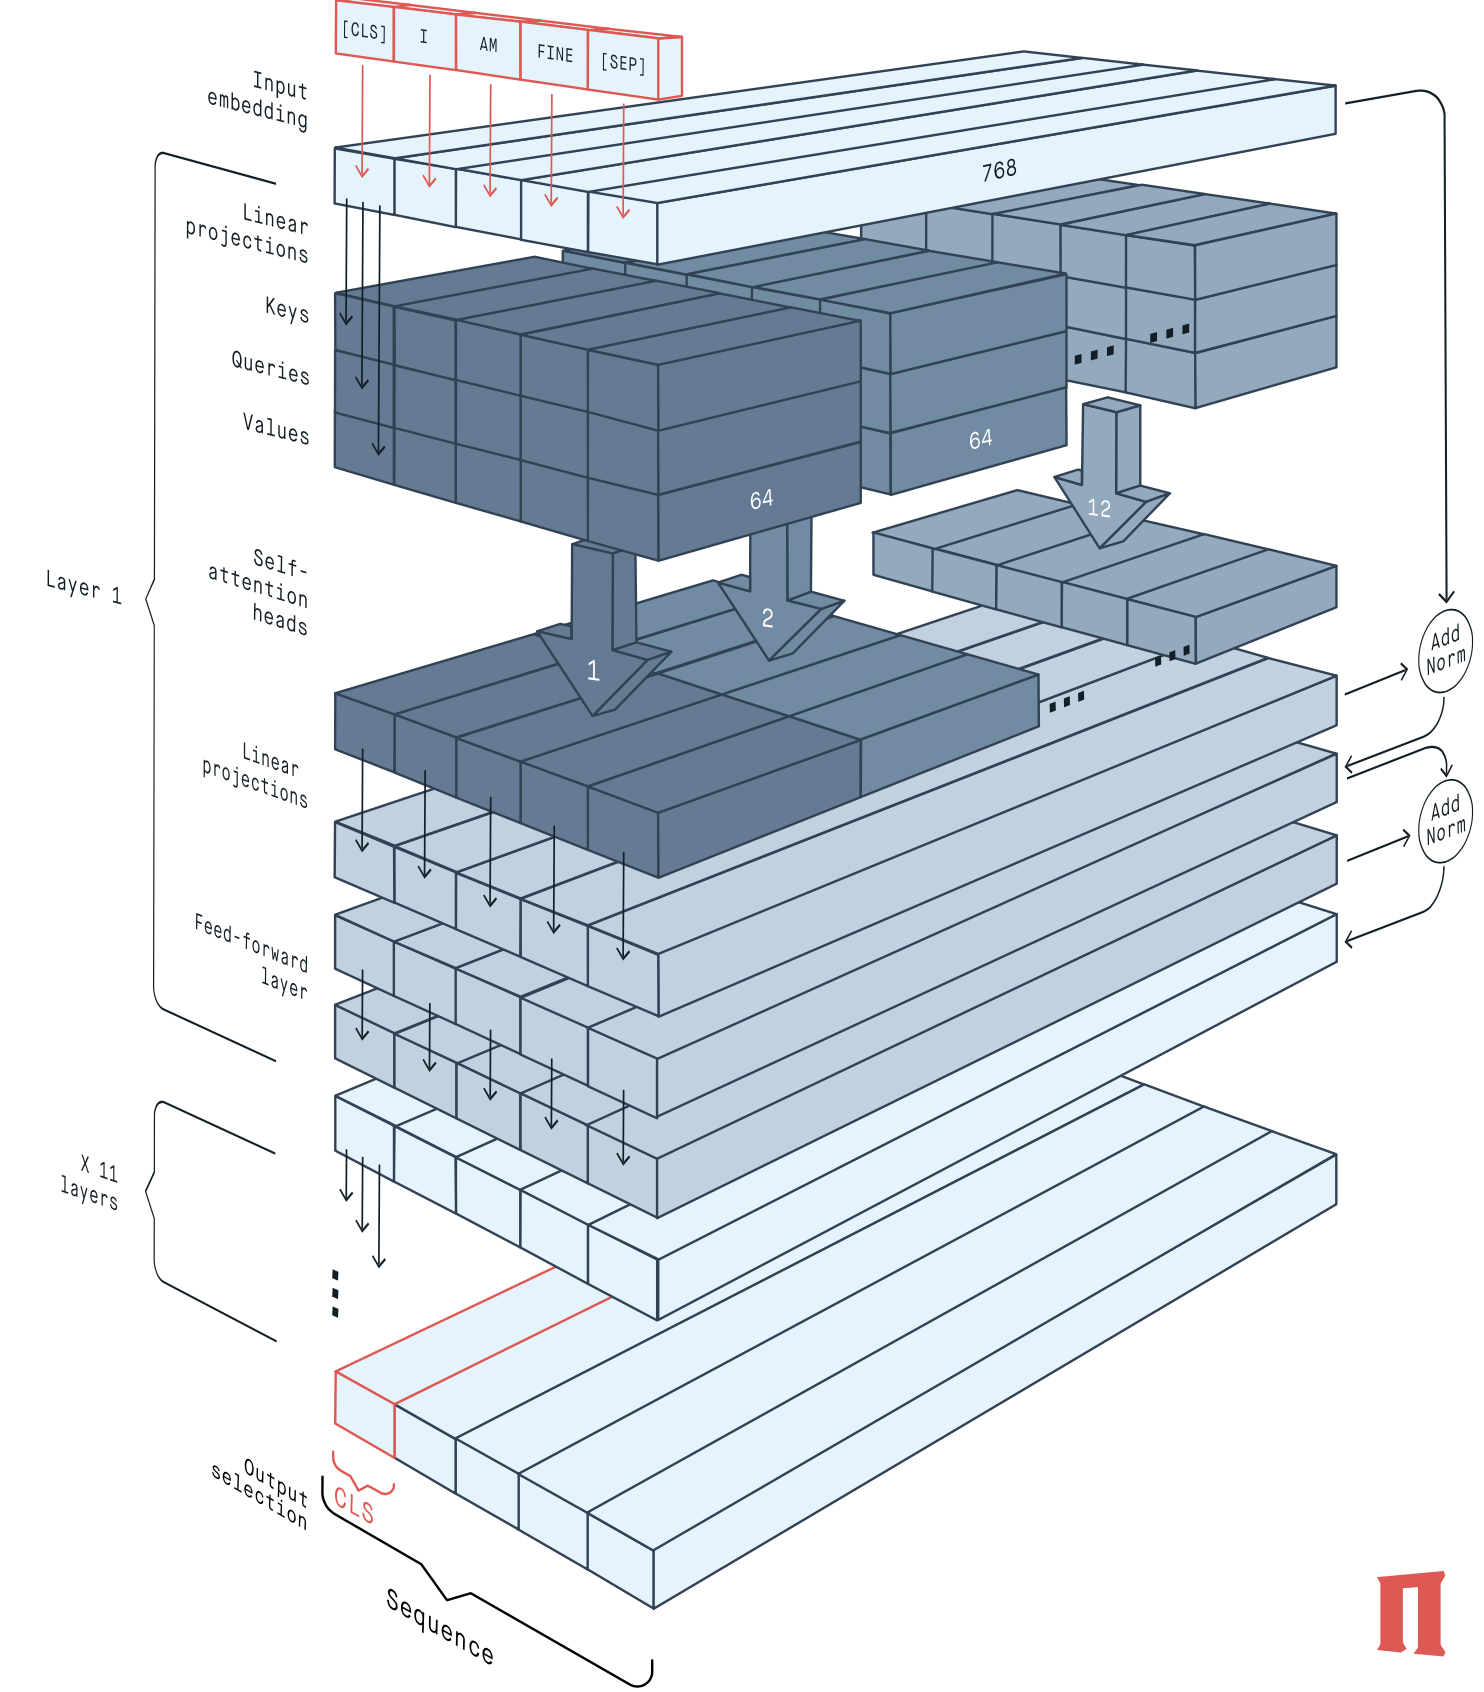

- Two Stategies apply pre-trained language representations to downstream tasks sharing the same objective functions
   - Feature-base: Such as ELMo, use task-specific architectures
     - ELMo:
       - According to neighbor words to adjust meaning of this word embedding expressions, dealing with ploysemi problem.
       - Use LSTM, but not Transformer for feature-extraction.
       - Bidirection Stitching structure
   - Fine-tuning: OpenAI GPT, introduces minimal task-specific parameters
     - GPT: 
       - One direction tasking (Use Content-before without  Content-after)
       - Use Transformer as feature-extraction method.
       - Pretrain + Fine-tuning
- Limitation : Standard language models are *unidirectional*, limiting choices of architectures.→🌟Bert eliminates this limitation by using `Masked Language Model(MLM)` pre-training objective
   - Randomly masking some of the tokens from input
   - Objective: predict original vocabulary of the masked word only based on its content.
   - Enable representation to fuse **the left and right context**, not only left-to-right or right-to-left LMs→🔄pretrain a deep `bidirectional Transformer`

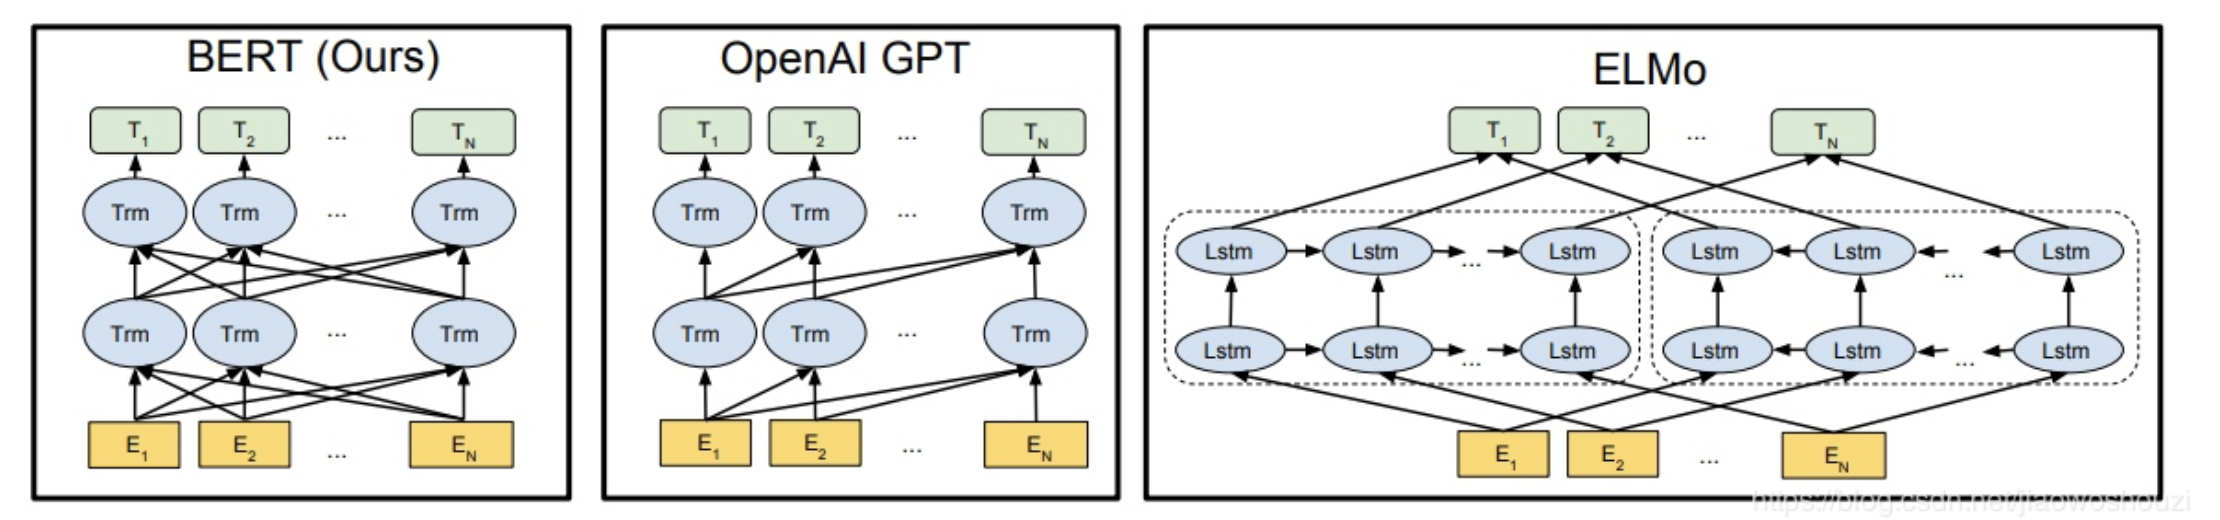

# Pre-Training Part
# 0. Embedding
Summation of three embedding:
  - Token Embedding: the first word is special classification token**(CLS)**, using for classification task.
  - Segment Embedding: classify two kinds of sentence **(SEP)**
  - Position Embedding: not the same as transformer's, it is produced by training. Provide information about the order of the words.

# 1. Masked Language Model(MLM)
- Process: Some words are masked (15% of total words are masked) randomly and the model tries to predict these masked tokens, not entire input sentence.
- Notion:
   - L: Numbers of layers(Transformer Blocks)
   - H: Hidden size
   - A: Number of attention heads.
- Two model sizes are selected:
   - Based BERT:
      - L=12, H=768, A=12, Total Parameters=110M 
      - Comparable in size to the OpenAI Transformer in order to **compare performance**
   - Larger BERT:
      - L=24, H=1024, A=16, Total Parameters=340M
      - Large size of language modeling!
- Masking Methods in 15% of total words:
  - 80% with [MASK] tokens
  - 10% with random tokens
  - 10% with original tokens

# 2. Next Sentence Prediction(NSP)
- Process: add a learned embedding to every token indicating whether it belongs to sentence A or sentence B.Understanding the relationship between two sentences.
- Notion:
   - E: Input Embedding
   - C: Final hidden vector of CLS as C
   - Ti: the final hidden vector for i-th input token
- Relationship between 2 sentences tasks:
   - 50% of the time B is the **actual next sentence** that follows A.
   - 50% of the time B is a **random sentence** from the corpus.


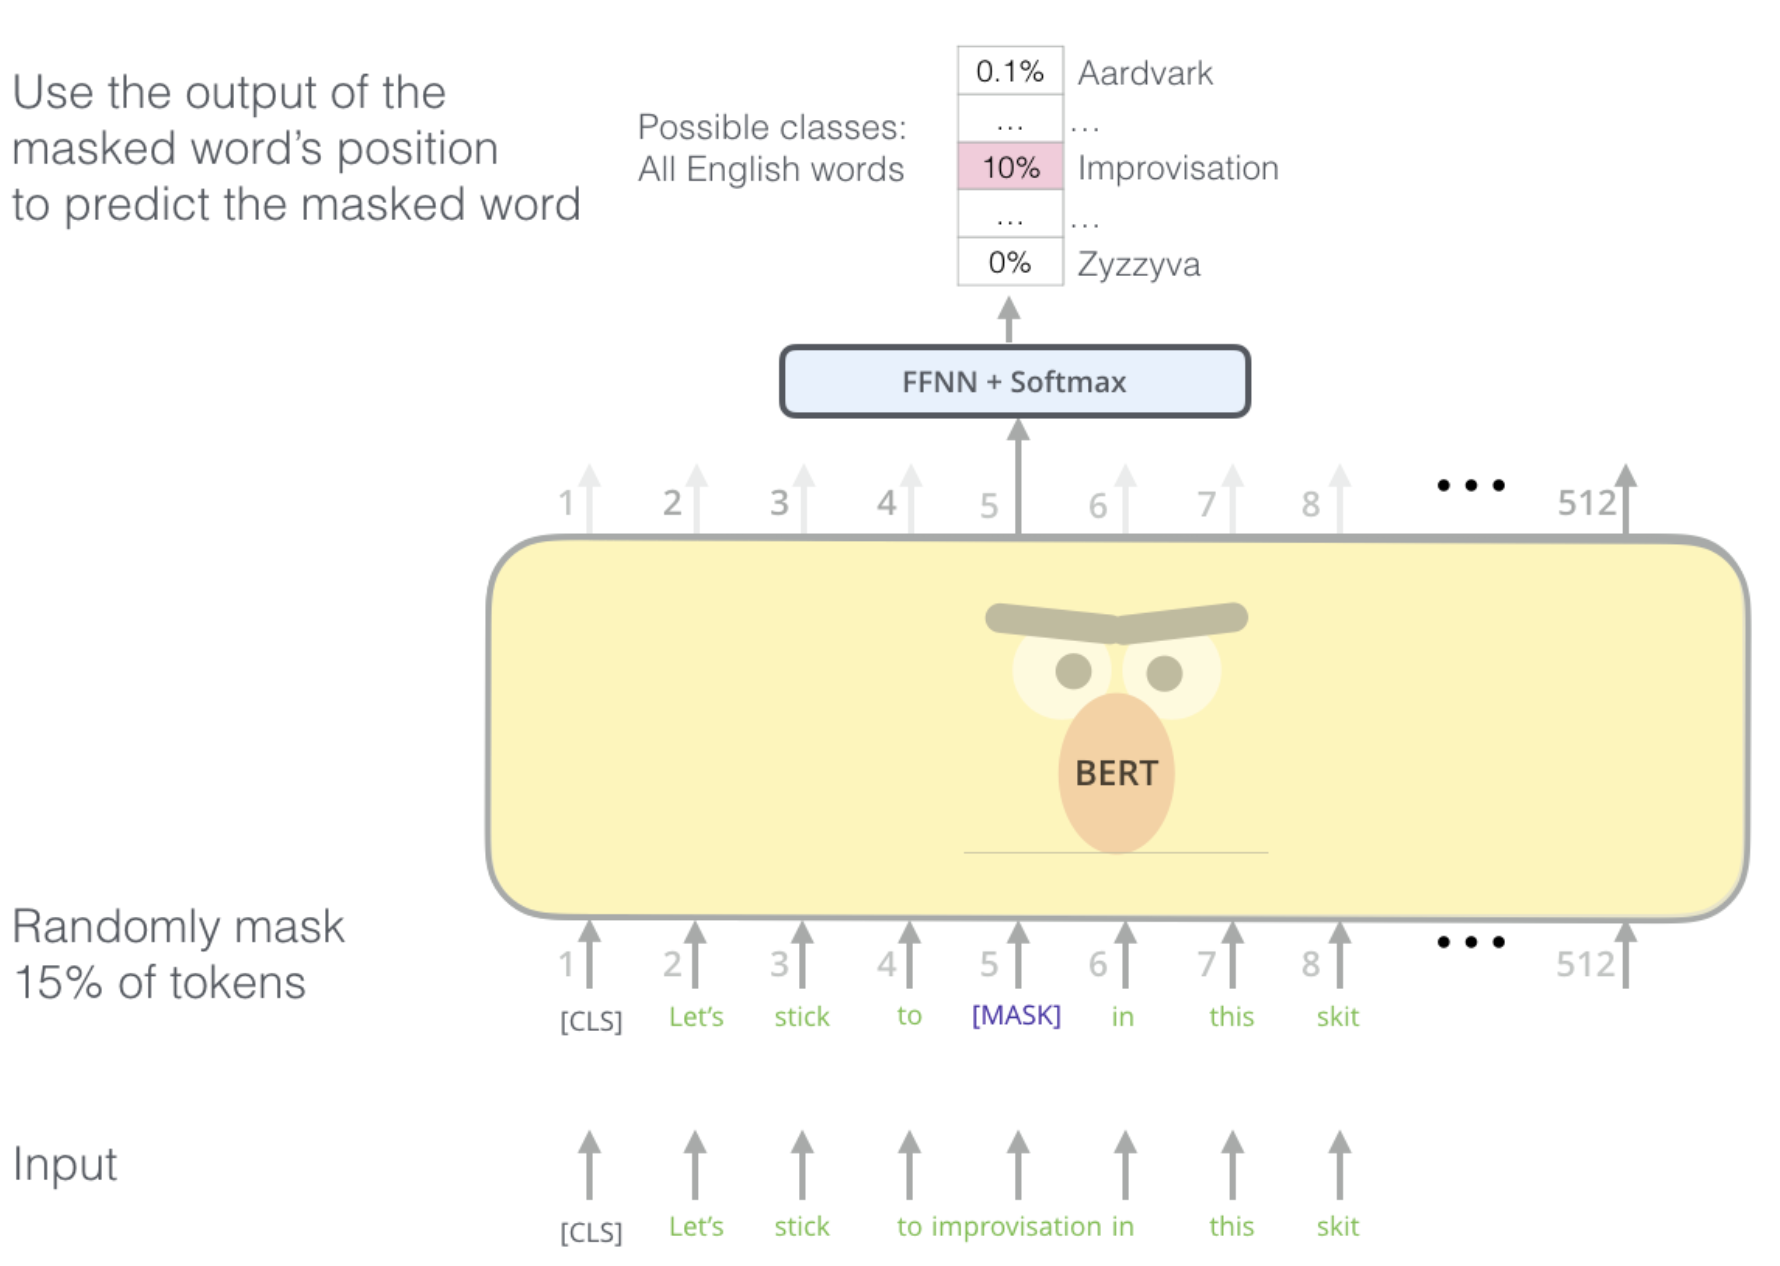

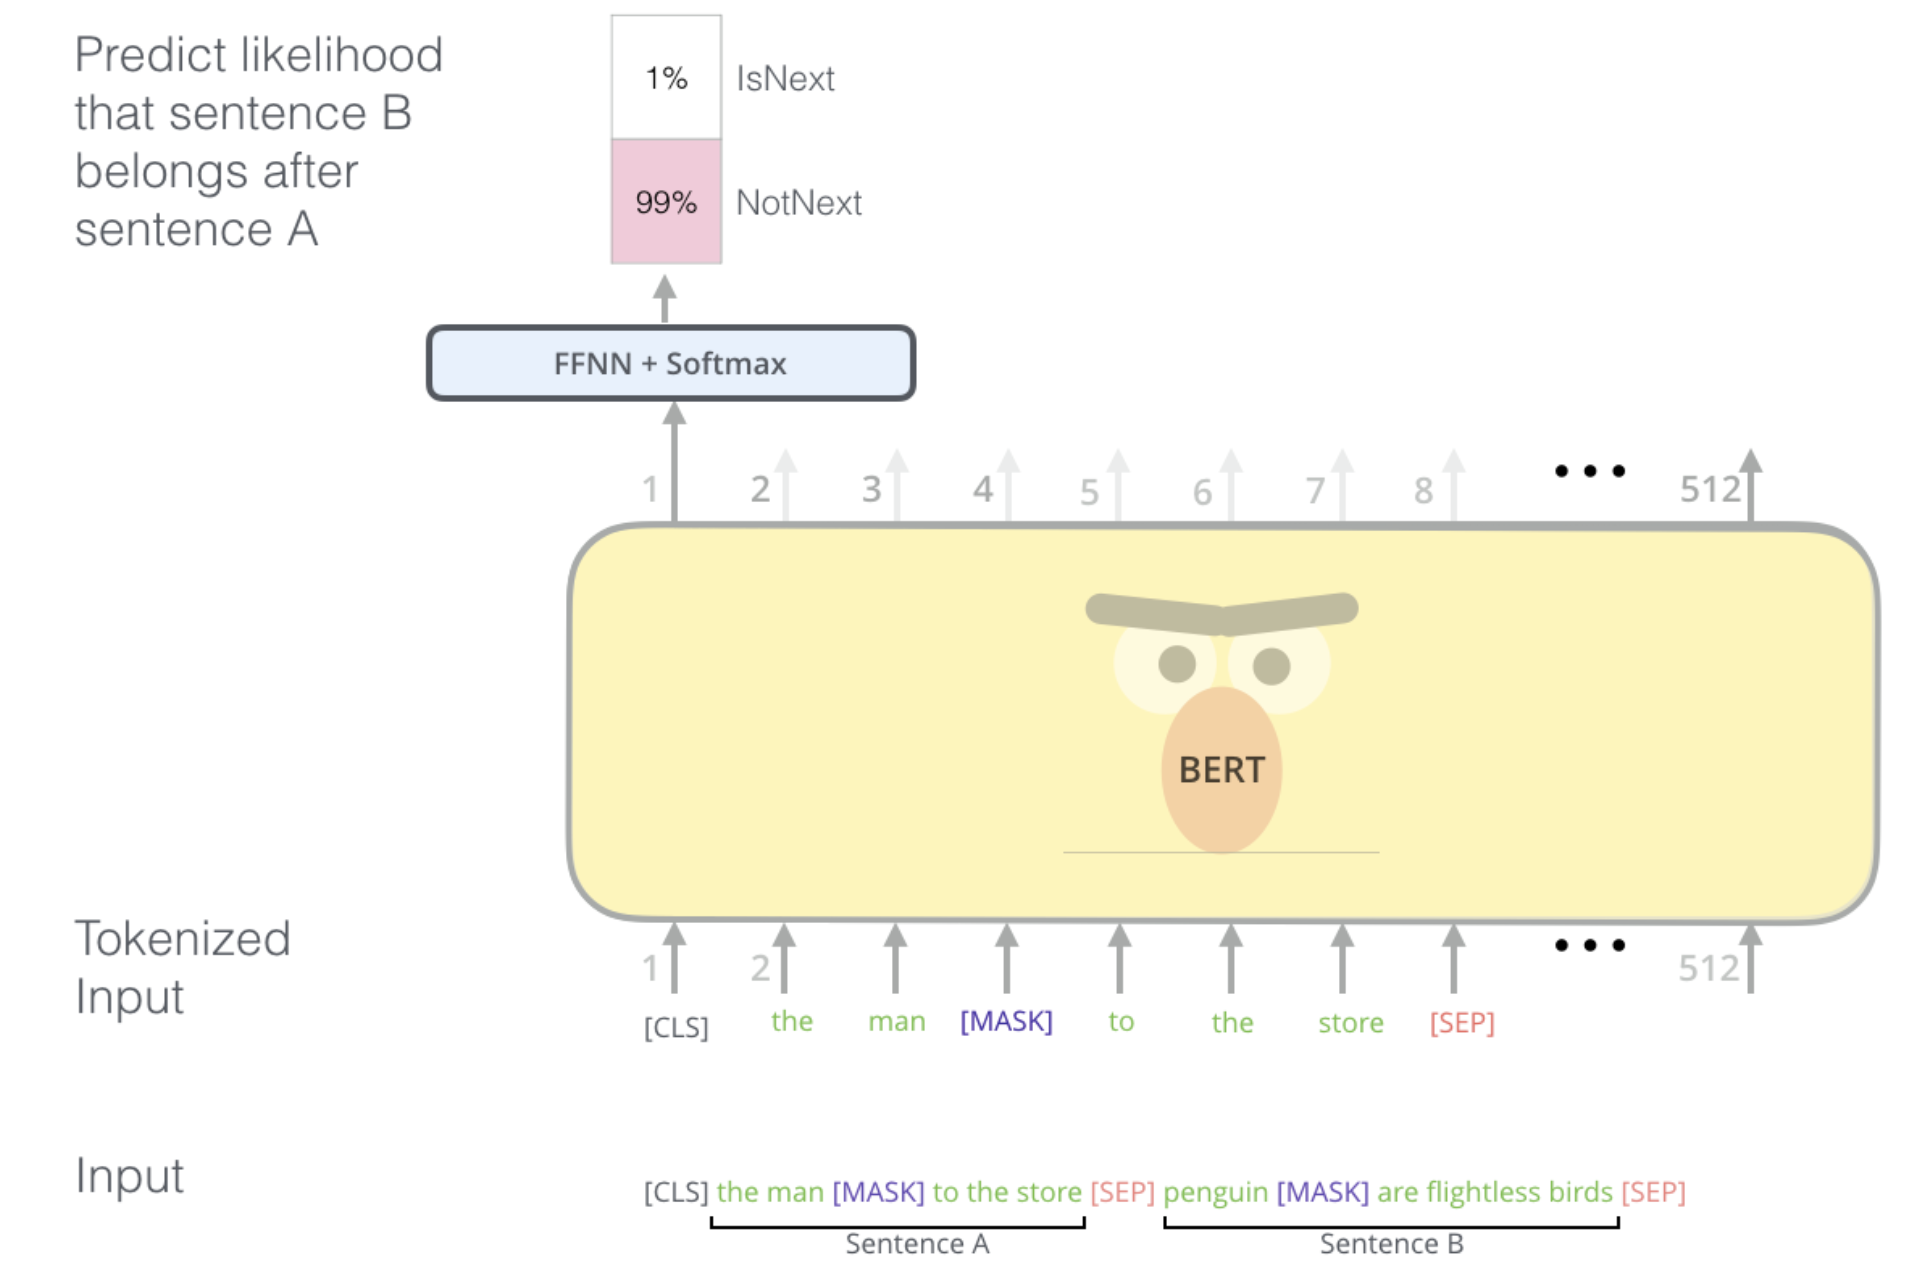

# Fine-tuning Part
- Swap out the appropriate inputs and outputs, involving single text and text pairs
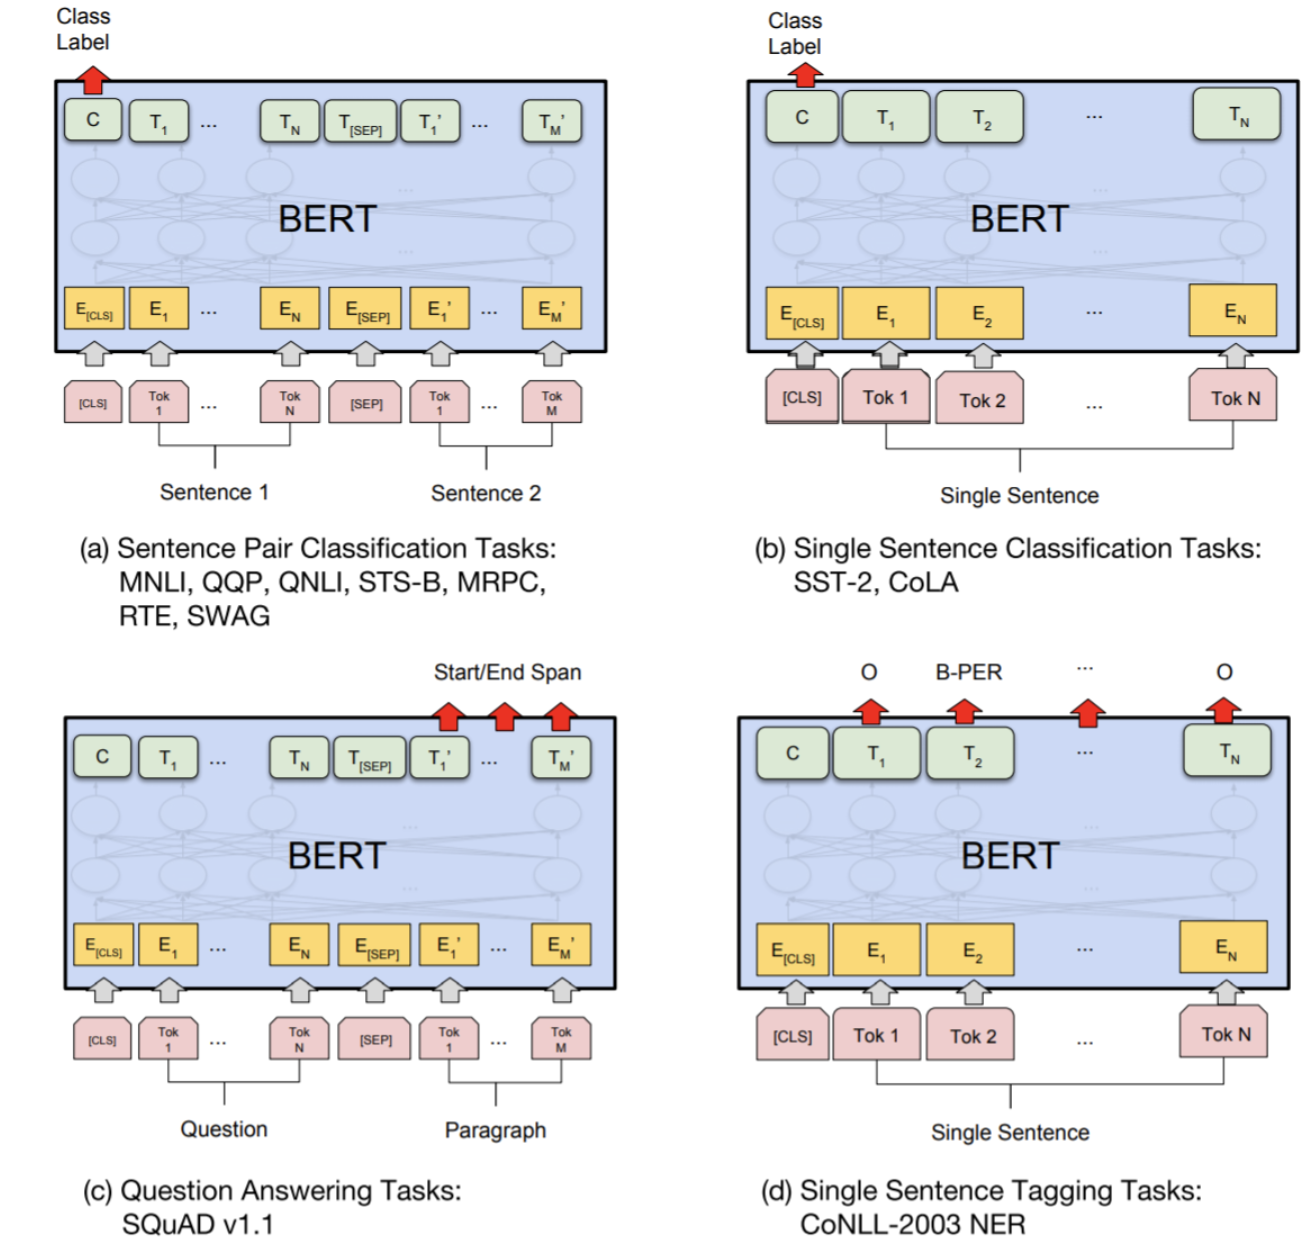

#References:

- Keeping up with the BERTs. https://medium.com/towards-data-science/keeping-up-with-the-berts-5b7beb92766
- Jay Alammer(2018), The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning)http://jalammar.github.io/illustrated-bert/